In [2]:
import sys
sys.path.append('valentinkilian/Documents/Cours/Stage2021/StageValentin/code/Deffuant')
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import scipy.stats as stats 

# Bibliothéque de Fonction

In [24]:
def sup_normal(v,nb_sim=100,N=100):
    s=0
    for loop in range(nb_sim):
        M=[]
        A=np.random.normal(1/2,v,N)
        for i in range(N):
            for j in range(i):
                M.append(np.abs(A[i]-A[j]))
        s+=np.max(M)
    return s/nb_sim

sup_normal=np.vectorize(sup_normal)

def borne(sup):
    return 1-2*sup

def positif(L):
    for i in range(len(L)):
        if L[i]<0:
            L[i]=0
    return L

borne=np.vectorize(borne)

def sup_beta(a,b=1,nb_sim=100,N=100):
    s=0
    for loop in range(nb_sim):
        M=[]
        A=np.random.beta(a,b,N)
        for i in range(N):
            for j in range(i):
                M.append(np.abs(A[i]-A[j]))
        s+=np.max(M)
    return s/nb_sim

sup_beta=np.vectorize(sup_beta)

def P_boule_normal(d,v,N=500):
    A=np.random.normal(1/2,v,N)
    s=0
    for test in A:
        if test>1/2-d and test<1/2+d:
            s+=1
    return s/N

P_boule_normal=np.vectorize(P_boule_normal)

def P_boule_beta(d,a,b=0.5,N=500):
    A=np.random.beta(a,b,N)
    s=0
    c=a/(a+b)
    for test in A:
        if test>c-d and test<c+d:
            s+=1
    return s/N

P_boule_beta=np.vectorize(P_boule_beta)

# Simulation

In [51]:
V=np.linspace(0.01,0.2,10)
S1=sup_normal(V)
B1=borne(S1)
P1=P_boule_normal(S1,V)

In [52]:
W=np.linspace(0.5,50,10)
S2=sup_beta(W)
B2=borne(S2)
P2=P_boule_beta(S2,W)

In [53]:
b3=4
S3=sup_beta(W,b=b3)
B3=borne(S3)
P3=P_boule_beta(S3,W,b=b3)

In [54]:
b4=8
S4=sup_beta(W,b=b4)
B4=borne(S3)
P4=P_boule_beta(S3,W,b=b4)

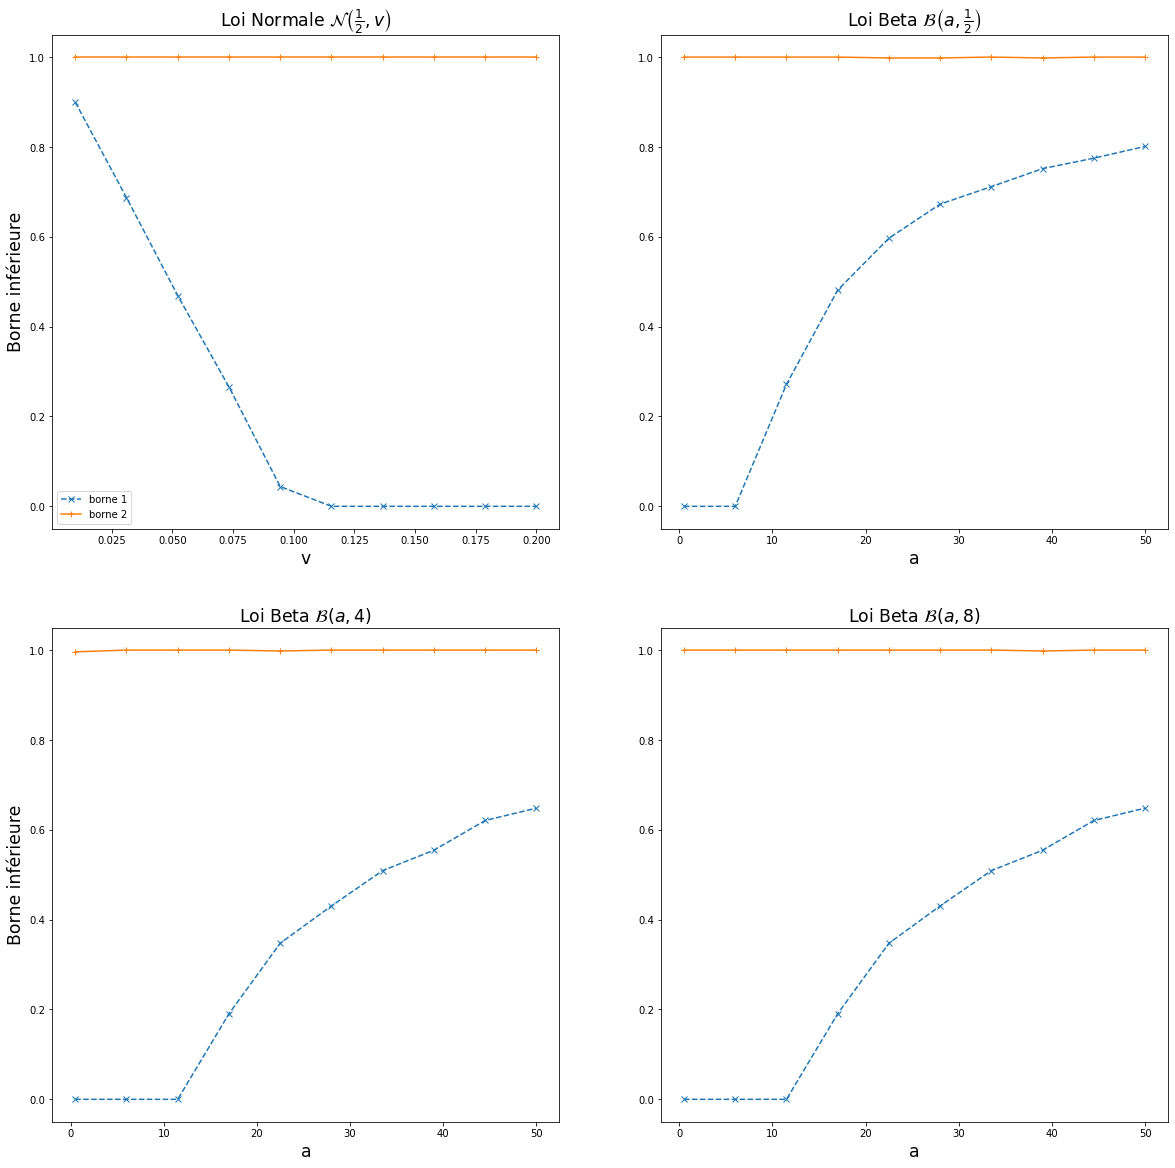

In [55]:
B1=positif(B1)
B2=positif(B2)
B3=positif(B3)
B4=positif(B4)

fig,ax = plt.subplots(2,2,figsize=(20,20))
                      
ax[0,0].plot(V,B1,'x--',label="borne 1")
ax[0,0].plot(V,P1,'+-',label="borne 2")
ax[0,0].set_ylabel("Borne inférieure",size='xx-large')
ax[0,0].set_xlabel("v",size='xx-large')
ax[0,0].set_title(r"Loi Normale $\mathcal{N}\left(\frac{1}{2},v\right)$",size='xx-large')
ax[0,0].legend()

ax[0,1].plot(W,B2,'x--')
ax[0,1].plot(W,P2,'+-')
ax[0,1].set_xlabel("a",size='xx-large')
ax[0,1].set_title(r"Loi Beta $\mathcal{B}\left(a,\frac{1}{2}\right)$",size='xx-large')



ax[1,0].plot(W,B3,'x--')
ax[1,0].plot(W,P3,'+-')
ax[1,0].set_xlabel("a",size='xx-large')
ax[1,0].set_ylabel("Borne inférieure",size='xx-large')
ax[1,0].set_title(r"Loi Beta $\mathcal{B}\left(a,4\right)$",size='xx-large')


ax[1,1].plot(W,B4,'x--')
ax[1,1].plot(W,P4,'+-')
ax[1,1].set_xlabel("a",size='xx-large')
ax[1,1].set_title(r"Loi Beta $\mathcal{B}\left(a,8\right)$",size='xx-large')


plt.savefig('Bornes.png', dpi=400)
plt.show()